In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost
from xgboost import XGBRegressor
import lightgbm
from lightgbm import LGBMRegressor

In [2]:
laptop = pd.read_csv("Clean.csv", sep=",")
laptop.shape

(3633, 13)

One-Hot-Encoding :
Laptop_Brand, CPU_Brand, CPU_Sub_Series, GPU_Brand

Label-Encoding/Ordinal-Encoding :
Resolution, Panel_Type

In [3]:
#Use OneHotEncoding

#ohe = OneHotEncoder(sparse=False, drop='first')
#ohe_enc = ohe.fit_transform(laptop[['Laptop_Brand','CPU_Brand','CPU_Sub_Series','GPU_Brand']])
#ohe_enc_df = pd.DataFrame(ohe_enc, columns=ohe.get_feature_names())
#laptop = laptop.join(ohe_enc_df)

#drop the column
#laptop.drop(['Laptop_Brand','CPU_Brand','CPU_Sub_Series','GPU_Brand'], axis=1, inplace=True)

In [4]:
#Use pandas get dummy
laptop = pd.get_dummies(laptop, columns=['Laptop_Brand','CPU_Brand','CPU_Sub_Series','GPU_Brand'], drop_first=True)

In [5]:
laptop['Resolution'].unique()

array(['1920 x 1080', '1366 x 768', '2560 x 1440', '2256 x 1504',
       '1600 x 900', '2560 x 1600', '3840 x 2160', '3072 x 1920',
       '1920 x 1200', '3840 x 2400', '1920 x 1280', '3200 x 1800',
       '3456 x 2160', '2160 x 1350'], dtype=object)

In [6]:
#Ordinal Encoder for Resolution
Res = ['1366 x 768', '1600 x 900', '1920 x 1080', '1920 x 1200',
      '1920 x 1280', '2160 x 1350', '2256 x 1504', '2560 x 1440',
      '2560 x 1600', '3072 x 1920', '3200 x 1800', '3456 x 2160',
      '3840 x 2160', '3840 x 2400']

enc_Res = OrdinalEncoder(categories=[Res])
laptop['Resolution'] = enc_Res.fit_transform(laptop[['Resolution']])

In [7]:
laptop['Panel_Type'].unique()

array(['IPS', 'TN', 'OLED'], dtype=object)

In [8]:
#Ordinal Encoder for Panel_Type
PT = ['TN', 'IPS', 'OLED']

enc_PT = OrdinalEncoder(categories=[PT])
laptop['Panel_Type'] = enc_PT.fit_transform(laptop[['Panel_Type']])

In [9]:
list(laptop.columns)

['RAM',
 'Screen_Size',
 'Resolution',
 'Panel_Type',
 'Touchscreen',
 'SSD',
 'HDD',
 'Weight',
 'Price',
 'Laptop_Brand_Asus',
 'Laptop_Brand_Del',
 'Laptop_Brand_Lenovo',
 'Laptop_Brand_MSI',
 'CPU_Brand_Intel',
 'CPU_Sub_Series_Core_i3',
 'CPU_Sub_Series_Core_i5',
 'CPU_Sub_Series_Core_i7',
 'CPU_Sub_Series_Core_i9',
 'CPU_Sub_Series_Ryzen_3',
 'CPU_Sub_Series_Ryzen_5',
 'CPU_Sub_Series_Ryzen_7',
 'CPU_Sub_Series_Ryzen_9',
 'GPU_Brand_Intel',
 'GPU_Brand_NVIDIA']

In [10]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3633 entries, 0 to 3632
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   RAM                     3633 non-null   int64  
 1   Screen_Size             3633 non-null   float64
 2   Resolution              3633 non-null   float64
 3   Panel_Type              3633 non-null   float64
 4   Touchscreen             3633 non-null   int64  
 5   SSD                     3633 non-null   int64  
 6   HDD                     3633 non-null   int64  
 7   Weight                  3633 non-null   float64
 8   Price                   3633 non-null   float64
 9   Laptop_Brand_Asus       3633 non-null   uint8  
 10  Laptop_Brand_Del        3633 non-null   uint8  
 11  Laptop_Brand_Lenovo     3633 non-null   uint8  
 12  Laptop_Brand_MSI        3633 non-null   uint8  
 13  CPU_Brand_Intel         3633 non-null   uint8  
 14  CPU_Sub_Series_Core_i3  3633 non-null   

# Create Baseline Model (Linear Regression)

In [11]:
X = laptop[['RAM', 'Screen_Size', 'Resolution', 'Panel_Type', 'Touchscreen','SSD', 'HDD', 'Weight', 
            'Laptop_Brand_Asus', 'Laptop_Brand_Del', 'Laptop_Brand_Lenovo', 'Laptop_Brand_MSI', 
            'CPU_Brand_Intel',
            'CPU_Sub_Series_Core_i3', 'CPU_Sub_Series_Core_i5', 'CPU_Sub_Series_Core_i7', 'CPU_Sub_Series_Core_i9', 
            'CPU_Sub_Series_Ryzen_3', 'CPU_Sub_Series_Ryzen_5', 'CPU_Sub_Series_Ryzen_7', 'CPU_Sub_Series_Ryzen_9',
            'GPU_Brand_Intel', 'GPU_Brand_NVIDIA']]

y = laptop[['Price']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 25)

In [12]:
#Evaluate accuracy

def evaluate(model, X_test, y_test, return_val = False):
    test_val = y_test['Price'].to_numpy().reshape(len(y_test.Price), 1)
    prediction = model.predict(X_test)
    plt.scatter(test_val, prediction)
    plt.xlabel('Actual_Price')
    plt.ylabel('Prediction_Price')
    plt.show()
    from sklearn import metrics
    print('MAE:', metrics.mean_absolute_error(test_val, prediction))
    print('MSE:', metrics.mean_squared_error(test_val, prediction))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(test_val, prediction)))
    print('R2 Score:', metrics.r2_score(test_val, prediction))
    print('Adjusted R2 Score:', 1-(1-metrics.r2_score(test_val, prediction))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1)))
    
    if return_val == True:
        return test_val, prediction

Non-Scaled Data


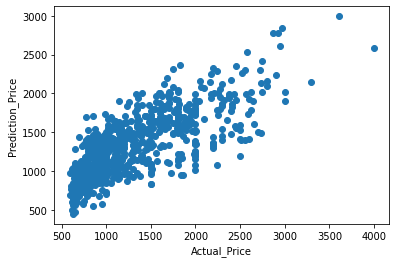

MAE: 291.2421514460974
MSE: 143355.4457716474
RMSE: 378.6230919683154
R2 Score: 0.5659865534436077
Adjusted R2 Score: 0.5625228791650522


In [57]:
lm = LinearRegression()
print('Non-Scaled Data')
lm.fit(X_train, y_train)
test_val, prediction = evaluate(lm, X_test, y_test, return_val = True)

<AxesSubplot:ylabel='Density'>

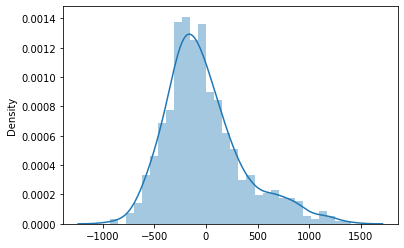

In [14]:
sns.distplot(test_val - prediction, bins = 30)

Well the baseline model is not good enough, because the R-squared only score 56%

In [15]:
# compute with statsmodels

import statsmodels.formula.api as sm
from statsmodels.stats.anova import anova_lm

result = sm.ols(formula = "Price ~ RAM + Screen_Size + Resolution + Panel_Type + Touchscreen + SSD + HDD + Weight + Laptop_Brand_Asus + Laptop_Brand_Del + Laptop_Brand_Lenovo + Laptop_Brand_MSI + CPU_Brand_Intel + CPU_Sub_Series_Core_i3 + CPU_Sub_Series_Core_i5 + CPU_Sub_Series_Core_i7 + CPU_Sub_Series_Core_i9 + CPU_Sub_Series_Ryzen_3 + CPU_Sub_Series_Ryzen_5 + CPU_Sub_Series_Ryzen_7 + CPU_Sub_Series_Ryzen_9 + GPU_Brand_Intel + GPU_Brand_NVIDIA", data=laptop).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.559
Method:                 Least Squares   F-statistic:                     210.6
Date:                Mon, 14 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:04:25   Log-Likelihood:                -26746.
No. Observations:                3633   AIC:                         5.354e+04
Df Residuals:                    3610   BIC:                         5.368e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -192

Most all of our features has significant relationship with our target variable, where the pvalue less than 0.05.   
But, we can say that, we unsure about the features like 'Laptop_Brand_MSI', 'Laptop_Brand_Asus', 'CPU_Sub_Series_Core_i3' because the pvalue is far more than 0.05

<AxesSubplot:>

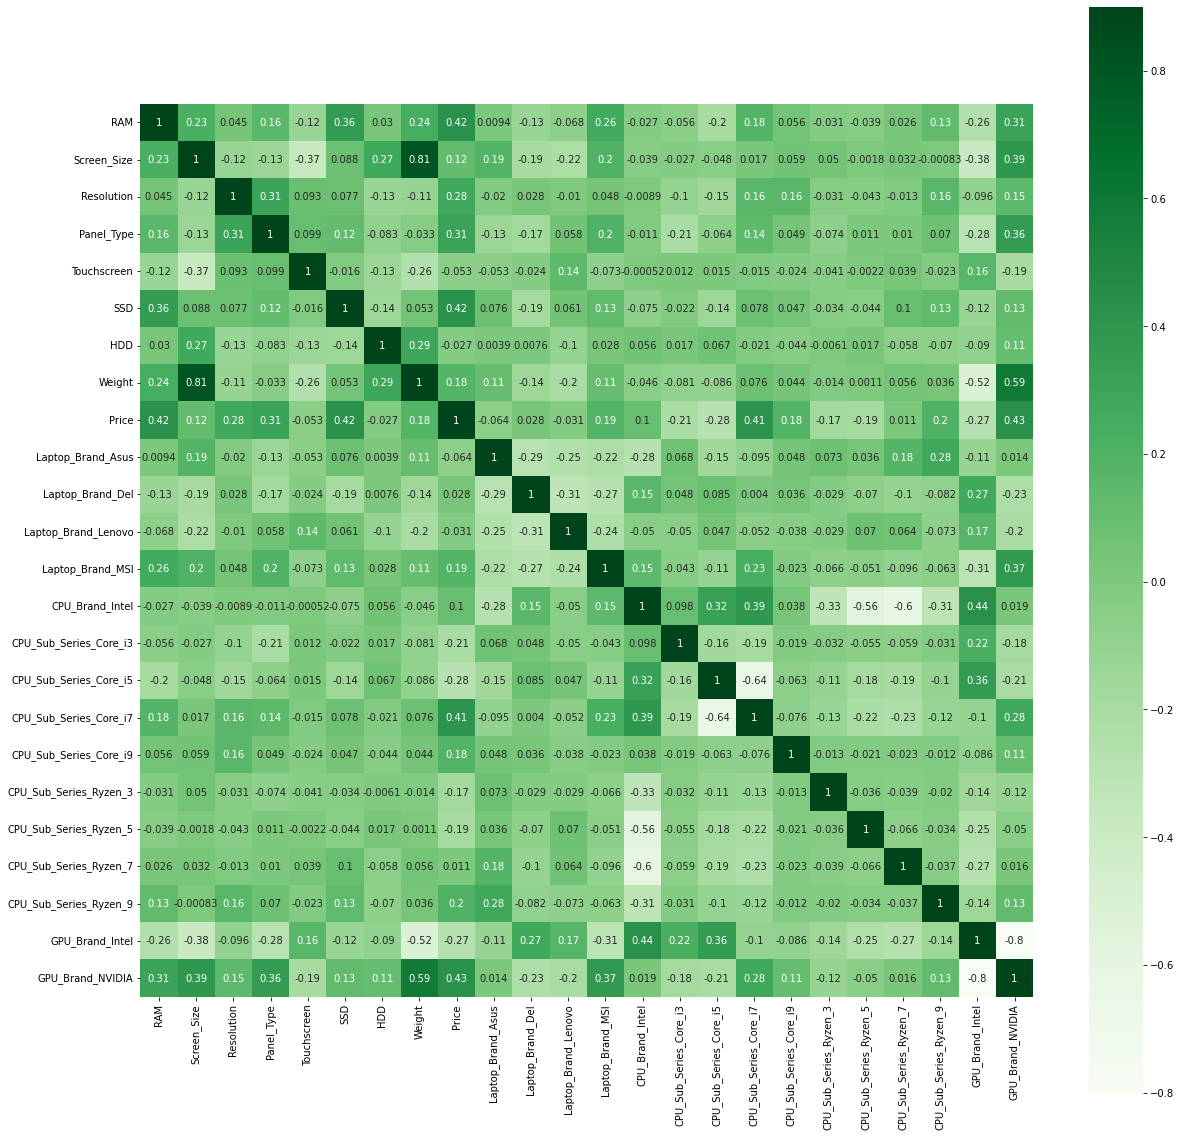

In [16]:
corr = laptop.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, vmax=0.9, cmap="Greens", square=True, annot=True)

Lets Scaled our data with "StandardScaler", scaled the data where the column value not '0' , '1'

"Even though the DecisionTree, RandomForest, XGBoost, LightGBM do not required scaled data",    
it's just for the curiousity

In [17]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler() 

In [18]:
laptop_num = laptop[['RAM', 'Screen_Size', 'Resolution', 'Panel_Type', 'SSD', 'HDD', 'Weight']] 
laptop_num_scaled = ss.fit_transform(laptop_num)

In [19]:
X_scaled = laptop[['Touchscreen', 
            'Laptop_Brand_Asus', 'Laptop_Brand_Del', 'Laptop_Brand_Lenovo', 'Laptop_Brand_MSI', 
            'CPU_Brand_Intel',
            'CPU_Sub_Series_Core_i3', 'CPU_Sub_Series_Core_i5', 'CPU_Sub_Series_Core_i7', 'CPU_Sub_Series_Core_i9', 
            'CPU_Sub_Series_Ryzen_3', 'CPU_Sub_Series_Ryzen_5', 'CPU_Sub_Series_Ryzen_7', 'CPU_Sub_Series_Ryzen_9',
            'GPU_Brand_Intel', 'GPU_Brand_NVIDIA']]

X_scaled['RAM'] = np.transpose(laptop_num_scaled)[0]
X_scaled['Screen_Size'] = np.transpose(laptop_num_scaled)[1]
X_scaled['Resolution'] = np.transpose(laptop_num_scaled)[2]
X_scaled['Panel_Type'] = np.transpose(laptop_num_scaled)[3]
X_scaled['SSD'] = np.transpose(laptop_num_scaled)[4]
X_scaled['HDD'] = np.transpose(laptop_num_scaled)[5]
X_scaled['Weight'] = np.transpose(laptop_num_scaled)[6]


y = laptop[['Price']]

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y, test_size = 0.20, random_state = 25)

Scaled Data
Prediction on testing set


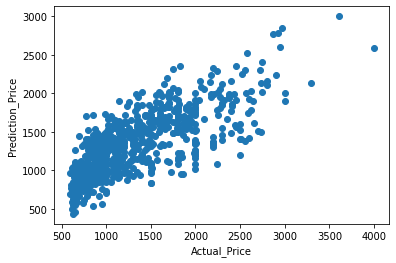

MAE: 291.33041265474554
MSE: 143250.6129110041
RMSE: 378.4846270471287
R2 Score: 0.5663039384645622
Adjusted R2 Score: 0.5628427970990816


In [58]:
print('Scaled Data')
lm.fit(X_train_scaled, y_train_scaled)
print('Prediction on testing set')
evaluate(lm, X_test_scaled, y_test_scaled)

# Decision Tree Regressor

## Standard Decision Tree Regressor

Non-Scaled Data
Prediction on testing set:


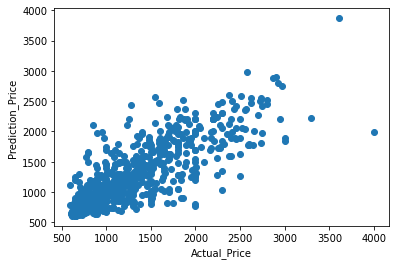

MAE: 231.73064970197157
MSE: 117901.22628706938
RMSE: 343.3674799497899
R2 Score: 0.643050061344816
Adjusted R2 Score: 0.6402013977122452


In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr_std = DecisionTreeRegressor()

print('Non-Scaled Data')
dtr_std.fit(X_train, y_train)
print('Prediction on testing set:')
evaluate(dtr_std, X_test, y_test)

Scaled Data
Prediction on testing set:


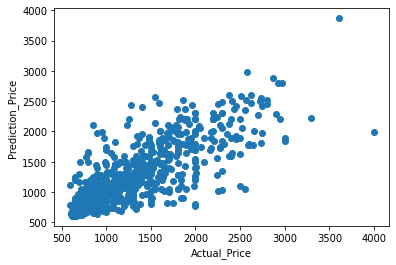

MAE: 236.72022329206783
MSE: 125844.29913094835
RMSE: 354.7454004366348
R2 Score: 0.6190021404397965
Adjusted R2 Score: 0.6159615607139517


In [34]:
print('Scaled Data')
dtr_std.fit(X_train_scaled, y_train_scaled)
print('Prediction on testing set:')
evaluate(dtr_std, X_test_scaled, y_test_scaled)

## Hyperparameter Decision Tree Regressor

check the documentation here   

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [43]:
dtt_param = {'max_depth'         : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'min_samples_split' : [2, 5, 10, 15, 20, 25],
             'min_samples_leaf'  : [2, 5, 10, 15, 20, 25],
             'max_features'      : ['auto','sqrt']}
             
dtt = DecisionTreeRegressor()
dtt_random = RandomizedSearchCV(estimator = dtt, param_distributions = dtt_param, 
                               n_iter = 500, cv = 10, verbose=1, random_state=25, n_jobs = -1)

dtt_random.fit(X_train, y_train)
print(dtt_random.best_params_)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 1680 tasks      | elapsed:    6.3s


{'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 90}


[Parallel(n_jobs=-1)]: Done 4930 tasks      | elapsed:   12.4s
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:   12.5s finished


Prediction on testing set:


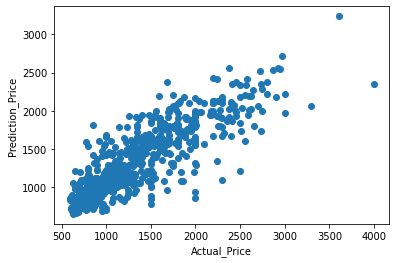

MAE: 205.06470042545502
MSE: 85881.26021266148
RMSE: 293.0550463866157
R2 Score: 0.7399915884683086
Adjusted R2 Score: 0.7379165733866886


In [44]:
dtt_tune = DecisionTreeRegressor()
dtt_tune = RandomForestRegressor(min_samples_split = 10, min_samples_leaf = 2, 
                                 max_features = 'auto', 
                                 max_depth = 90)
dtt_tune.fit(X_train, y_train)
print('Prediction on testing set:')
evaluate(dtt_tune, X_test, y_test)

# Random Forest Regressor

## Standard Random Forest Regressor

Non-Scaled Data
Prediction on testing set:


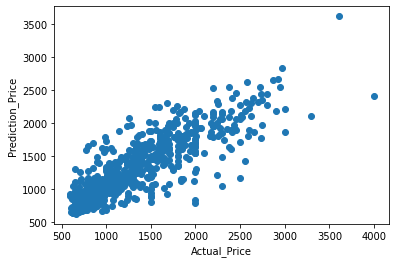

MAE: 200.3006462512648
MSE: 88037.78973882669
RMSE: 296.7116272390192
R2 Score: 0.7334626226015881
Adjusted R2 Score: 0.7313355026570484


In [39]:
from sklearn.ensemble import RandomForestRegressor
rfr_std = RandomForestRegressor()

print('Non-Scaled Data')
rfr_std.fit(X_train, y_train)
print('Prediction on testing set:')
evaluate(rfr_std, X_test, y_test)

Scaled Data
Prediction on testing set:


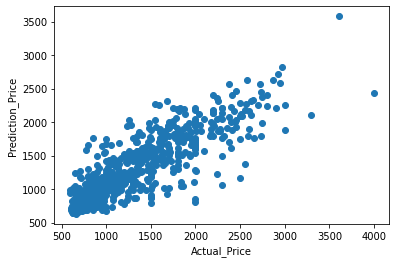

MAE: 200.999995192136
MSE: 88112.93516678402
RMSE: 296.838230635449
R2 Score: 0.7332351172842619
Adjusted R2 Score: 0.7311061817178282


In [40]:
print('Scaled Data')
rfr_std.fit(X_train_scaled, y_train_scaled)
print('Prediction on testing set:')
evaluate(rfr_std, X_test_scaled, y_test_scaled)

## Hyperparameter Random Forest Regressor

Check the documentation here   


https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
    
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [45]:
from sklearn.model_selection import RandomizedSearchCV

rff_param = {'n_estimators'      : [25, 50, 75, 100, 125, 150],
             'max_depth'         : [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
             'min_samples_split' : [2, 5, 10, 15, 20, 25],
             'min_samples_leaf'  : [2, 5, 10, 15, 20, 25],
             'max_features'      : ['auto','sqrt'],
             'bootstrap'         : [True, False]}

rfr = RandomForestRegressor()
rfr_random = RandomizedSearchCV(estimator = rfr, param_distributions = rff_param, 
                               n_iter = 500, cv = 10, verbose=1, random_state=25, n_jobs = -1)

rfr_random.fit(X_train, y_train)
print(rfr_random.best_params_)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  8.2min finished


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 50, 'bootstrap': True}


Prediction on testing set:


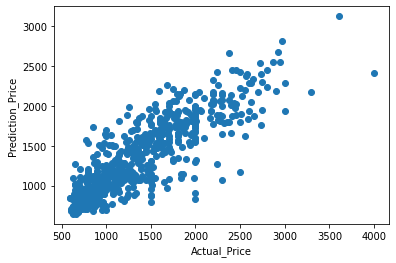

MAE: 201.61257763892505
MSE: 84427.28332706135
RMSE: 290.56373367483656
R2 Score: 0.7443935525230111
Adjusted R2 Score: 0.742353667619482


In [46]:
rfr_tune = RandomForestRegressor()
rfr_tune = RandomForestRegressor(n_estimators = 100, min_samples_split = 2,
                                 min_samples_leaf = 2, max_features = 'auto', 
                                 max_depth = 50, bootstrap = True)
rfr_tune.fit(X_train, y_train)
print('Prediction on testing set:')
evaluate(rfr_tune, X_test, y_test)

# XGBoost

## Standard XGBoost

Non-Scaled Data
Prediction on testing set:


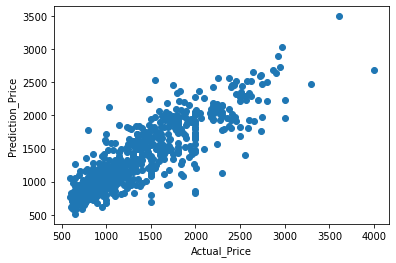

MAE: 193.4237933139722
MSE: 77648.78507446212
RMSE: 278.6553158912676
R2 Score: 0.7649156845791127
Adjusted R2 Score: 0.7630395779674957


In [47]:
import xgboost
from xgboost import XGBRegressor
xgb_std = XGBRegressor()

print('Non-Scaled Data')
xgb_std.fit(X_train, y_train)
print('Prediction on testing set:')
evaluate(xgb_std, X_test, y_test)

Scaled Data
Prediction on testing set:


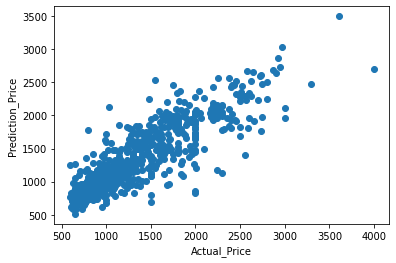

MAE: 194.00779462098092
MSE: 78909.26806821686
RMSE: 280.90793521760264
R2 Score: 0.7610995298073112
Adjusted R2 Score: 0.759192968109035


In [48]:
print('Scaled Data')
xgb_std.fit(X_train_scaled, y_train_scaled)
print('Prediction on testing set:')
evaluate(xgb_std, X_test_scaled, y_test_scaled)

Test it for the underfits or overfits

Prediction on training set:


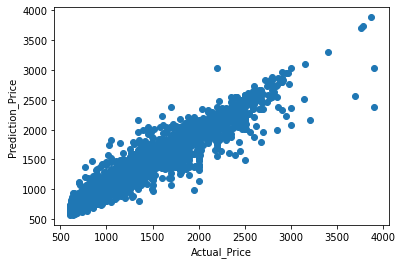

MAE: 115.98591094025561
MSE: 30282.18283187349
RMSE: 174.0177658512874
R2 Score: 0.9086414179709816
Adjusted R2 Score: 0.9079123244988555


Prediction on testing set:


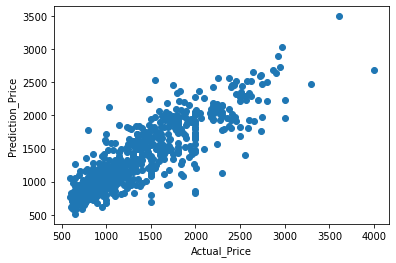

MAE: 193.4237933139722
MSE: 77648.78507446212
RMSE: 278.6553158912676
R2 Score: 0.7649156845791127
Adjusted R2 Score: 0.7630395779674957


In [49]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
print('Prediction on training set:')
evaluate(xgb, X_train, y_train)
print('\n')
print('Prediction on testing set:')
evaluate(xgb, X_test, y_test)

## Hyperparameter XGBoost

Heres the documentation   

https://xgboost.readthedocs.io/en/latest/parameter.html

In [51]:
xgb_param = {'n_estimators'     : [25, 50, 75, 100, 125, 150],
             'max_depth'        : [2, 3, 4, 5, 6, 7, 8],
             'min_child_weight' : [5, 10, 15],
             'subsample'        : [0.2, 0.3, 0.4, 0.5, 0.6],
             'lambda'           : [2, 4, 6, 8],
             'alpha'            : [3, 5, 7, 9]}

xgb = XGBRegressor()
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = xgb_param, 
                                     n_iter = 500, cv = 10, verbose = 1, random_state = 25, n_jobs = -1)

xgb_random.fit(X_train, y_train)
print(xgb_random.best_params_)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  7.9min finished


{'subsample': 0.6, 'n_estimators': 125, 'min_child_weight': 15, 'max_depth': 8, 'lambda': 8, 'alpha': 9}


Prediction on Training Set:


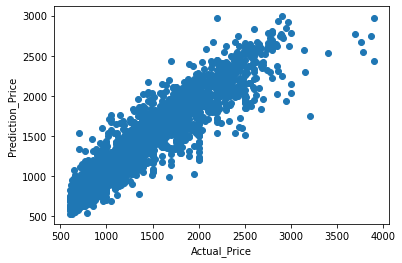

MAE: 139.53120922196265
MSE: 41189.76573960473
RMSE: 202.9526194450437
R2 Score: 0.875734235772563
Adjusted R2 Score: 0.8747425242606854


Prediction on Testing Set:


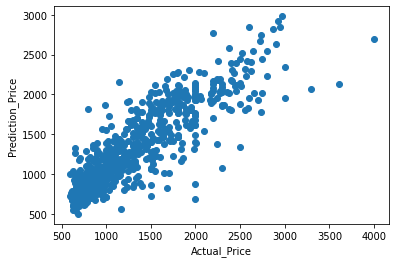

MAE: 201.8418687268956
MSE: 82835.40116837394
RMSE: 287.8113986074456
R2 Score: 0.7492130294426678
Adjusted R2 Score: 0.7472116067074774


In [52]:
xgb_tune = XGBRegressor(subsample=0.6, n_estimators=125, min_child_weight=15, 
                        max_depth=8, reg_lambda=9, alpha=9)

xgb_tune.fit(X_train, y_train)
print('Prediction on Training Set:')
evaluate(xgb_tune, X_train, y_train)
print('\n')
print('Prediction on Testing Set:')
evaluate(xgb_tune, X_test, y_test)

# Light GBM

## Standard Light GBM

Non-Scaled Data
Prediction on testing set:


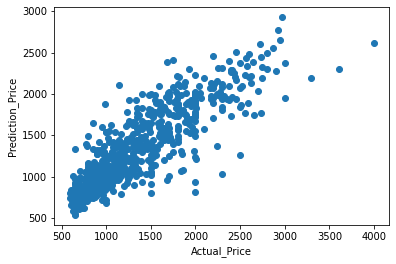

MAE: 199.55866208712095
MSE: 81359.73774330916
RMSE: 285.23628405816316
R2 Score: 0.7536806502269509
Adjusted R2 Score: 0.7517148816479154


In [53]:
import lightgbm
from lightgbm import LGBMRegressor
lgb_std = LGBMRegressor()

print('Non-Scaled Data')
lgb_std.fit(X_train, y_train)
print('Prediction on testing set:')
evaluate(lgb_std, X_test, y_test)

Scaled Data
Prediction on testing set:


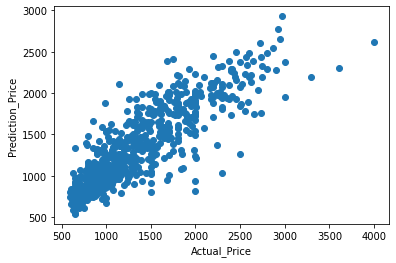

MAE: 199.55953236268573
MSE: 81396.61216024273
RMSE: 285.30091510586277
R2 Score: 0.753569011686141
Adjusted R2 Score: 0.7516023521680221


In [54]:
print('Scaled Data')
lgb_std.fit(X_train_scaled, y_train_scaled)
print('Prediction on testing set:')
evaluate(lgb_std, X_test_scaled, y_test_scaled)

Check  for overfitting

Prediction on training set:


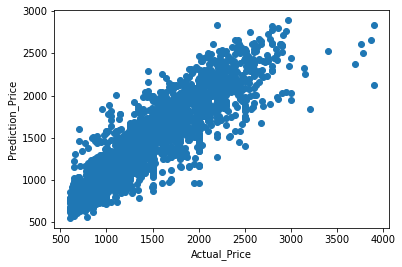

MAE: 167.6410941959475
MSE: 57762.91564147005
RMSE: 240.3391679303855
R2 Score: 0.8257345549967401
Adjusted R2 Score: 0.8243438175799895


Prediction on testing set:


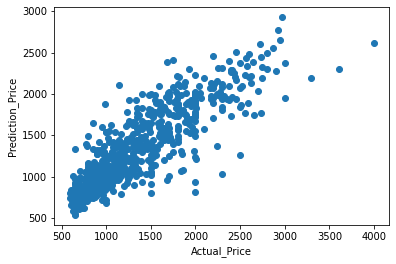

MAE: 199.55866208712095
MSE: 81359.73774330916
RMSE: 285.23628405816316
R2 Score: 0.7536806502269509
Adjusted R2 Score: 0.7517148816479154


In [24]:
lgb = LGBMRegressor()
lgb.fit(X_train, y_train)
print('Prediction on training set:')
evaluate(lgb, X_train, y_train)
print('\n')
print('Prediction on testing set:')
evaluate(lgb, X_test, y_test)

# Hyperparameter Light GBM

Heres the documentation    

https://lightgbm.readthedocs.io/en/latest/Parameters.html

In [55]:
lgb_param = {'n_estimators '    : [25, 50, 75, 100, 125, 150],
             'num_leaves'       : [20, 25, 30, 35, 40, 45, 50, 55, 60, 75],
             'min_data_in_leaf' : [20, 30, 40, 50, 60, 70],
             'max_depth'        : [2, 3, 4, 5, 6, 7, 8],
             'feature_fraction' : [0.5, 0.6, 0.7, 0.8],
             'extra_trees'      : [True, False],
             'path_smooth'      : [5, 10, 15, 20, 25]}

lgb = LGBMRegressor()
lgb_random = RandomizedSearchCV(estimator = lgb, param_distributions = lgb_param, 
                                     n_iter = 500, cv = 10, verbose = 1, random_state = 25, n_jobs = -1)

lgb_random.fit(X_train, y_train)
print(lgb_random.best_params_)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   56.8s
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  2.7min


[LightGBM] [Warning] Unknown parameter: 100
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] num_iterations is set=100, n_estimators= will be ignored. Current value: num_iterations=100
{'path_smooth': 5, 'num_leaves': 55, 'n_estimators ': 100, 'min_data_in_leaf': 20, 'max_depth': 8, 'feature_fraction': 0.7, 'extra_trees': False}


[Parallel(n_jobs=-1)]: Done 5000 out of 5000 | elapsed:  2.7min finished


Prediction on Training Set:


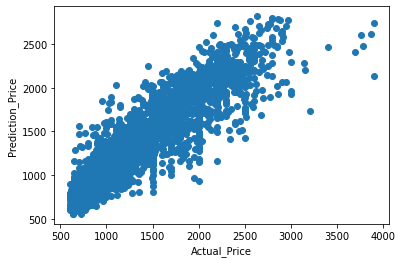

MAE: 173.42579607224127
MSE: 61215.13671429412
RMSE: 247.4169289161397
R2 Score: 0.8153195190723173
Adjusted R2 Score: 0.8138456637422212


Prediction on Testing Set:


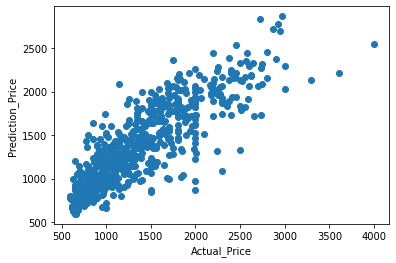

MAE: 203.42382242712117
MSE: 83116.58476019798
RMSE: 288.29947062073836
R2 Score: 0.7483617366358563
Adjusted R2 Score: 0.74635352009964


In [56]:
lgb_tune = LGBMRegressor(path_smooth=5, num_leaves=55, n_estimators=100 ,min_data_in_leaf=20, 
                         max_depth=8, feature_fraction=0.7 ,extra_trees=False)

lgb_tune.fit(X_train, y_train)
print('Prediction on Training Set:')
evaluate(lgb_tune, X_train, y_train)
print('\n')
print('Prediction on Testing Set:')
evaluate(lgb_tune, X_test, y_test)

The best model in my data is used xgb standard

In [59]:
import joblib

joblib.dump(xgb_std,'XGB_model')

['XGB_model']

In [60]:
feature_imp = pd.DataFrame(zip(X.columns, xgb_std.feature_importances_))
feature_imp = feature_imp.rename({0:'Feature Name', 1:'Importance'}, axis = 'columns')
feature_imp = feature_imp.sort_values(by=['Importance'], ascending = [False]).reset_index(drop = True)
feature_imp.to_csv('Feature Importance.csv')

In [61]:
feature_imp

,Feature Name,Importance
0,CPU_Sub_Series_Core_i7,0.299506
1,Laptop_Brand_Lenovo,0.095802
2,Weight,0.074255
3,Laptop_Brand_Asus,0.074035
4,Laptop_Brand_MSI,0.054748
5,Laptop_Brand_Del,0.043939
6,CPU_Sub_Series_Core_i3,0.043610
7,CPU_Sub_Series_Ryzen_7,0.041690
8,CPU_Sub_Series_Core_i9,0.033702
9,Resolution,0.027923
